# Text Preprocessing

In [5]:
import nltk
import spacy
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import pandas as pd

In [6]:
pd.options.display.max_colwidth = 200
pd.options.display.max_colwidth = 200

In [7]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [30]:
# from google.colab import drive
# # drive.mount('/content/drive')

In [31]:
# path = '/content/drive/MyDrive/mydataset/PPN.csv'

# Read data

In [8]:
df = pd.read_csv("/content/PPN.csv")
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1873869673743491336,Mon Dec 30 23:54:34 +0000 2024,0,@likromiahooy Paginya ppn naik 12%,1873880391230333420,NaN,likromiahooy,in,NaN,0,0,0,https://x.com/nwotariz/status/1873880391230333420,1313516922353283073,nwotariz
1,1873538051047334049,Mon Dec 30 23:50:29 +0000 2024,2,@AdamVelcro 1. Krn sudah dikondisikan di media kalau kenaikan ppn 12% diinisiasi PDIP. Jadi dia berharap kalau tetap naik rakyat akan semakin ga suka dg PDIP. 2. Ini pemerintahan Prabowo. Jadi dia...,1873879360413065392,NaN,AdamVelcro,in,most beautiful place on earth,0,1,0,https://x.com/staysaferek/status/1873879360413065392,932657813930721280,staysaferek
2,1873758639783289310,Mon Dec 30 23:49:49 +0000 2024,0,@exhumaclown rapat ppn krn naik jadi 12% kah?,1873879192255013092,NaN,exhumaclown,in,she/her,0,1,0,https://x.com/ikeulabs/status/1873879192255013092,768414071137775616,ikeulabs
3,1873878259844419990,Mon Dec 30 23:46:06 +0000 2024,0,Apakah ini hari pemborosan sebelum ppn naik 12%?,1873878259844419990,NaN,NaN,in,🇮🇩,1,1,0,https://x.com/flyashh/status/1873878259844419990,997760451592183808,flyashh
4,1873702424453796059,Mon Dec 30 23:33:38 +0000 2024,0,@kompascom Kl pabrik / usaha nya yg memproduksi produk pangan tersebut kena ppn 12% ya berpotensi scr tdk lgs akan naik jg harganya pak..,1873875120198197421,NaN,kompascom,in,NaN,0,0,0,https://x.com/RamsDews/status/1873875120198197421,1714509511883628544,RamsDews


# get subset Text

In [9]:
df = df[['full_text']]

In [10]:
df.head()

,full_text
0,@likromiahooy Paginya ppn naik 12%
1,@AdamVelcro 1. Krn sudah dikondisikan di media kalau kenaikan ppn 12% diinisiasi PDIP. Jadi dia berharap kalau tetap naik rakyat akan semakin ga suka dg PDIP. 2. Ini pemerintahan Prabowo. Jadi dia...
2,@exhumaclown rapat ppn krn naik jadi 12% kah?
3,Apakah ini hari pemborosan sebelum ppn naik 12%?
4,@kompascom Kl pabrik / usaha nya yg memproduksi produk pangan tersebut kena ppn 12% ya berpotensi scr tdk lgs akan naik jg harganya pak..


# Case Folding

In [11]:
df['lower_case'] = df['full_text'].str.lower()
df.sample(5)

,full_text,lower_case
149,@Dennysiregar7 PPN di paksa naik 12% dintambah Pajak kendaraan bermotor 66% buat bayar hutang peninggalan Mulyono yang mencapai rubuan Trilyun. Coba gimana nasib rakyat bangsa ini kalau tidak bers...,@dennysiregar7 ppn di paksa naik 12% dintambah pajak kendaraan bermotor 66% buat bayar hutang peninggalan mulyono yang mencapai rubuan trilyun. coba gimana nasib rakyat bangsa ini kalau tidak bers...
189,@convomf Tapi emang bener dah semua bahan naik ya Allaahhhh moga aja ini hanya efek akhir tahun setelah itu normal lagi tapi nggak tau yah yg PPN 12 itu Jadi pengen bubur ayam,@convomf tapi emang bener dah semua bahan naik ya allaahhhh moga aja ini hanya efek akhir tahun setelah itu normal lagi tapi nggak tau yah yg ppn 12 itu jadi pengen bubur ayam
146,@DitjenPajakRI Anda pikir PPN dr 11% naik ke 12% HPP ny bakalan tetap sama???,@ditjenpajakri anda pikir ppn dr 11% naik ke 12% hpp ny bakalan tetap sama???
205,Pengen marah² sama para 02 mecekik bgt kebijkan skrng. PPN naik 12% BPJS makin dibatasi dan pengadilan kasus korupsi ga masuk akal. Mamam tuh makan gratis yg ga keliatan sampe skrg!!! https://t.co...,pengen marah² sama para 02 mecekik bgt kebijkan skrng. ppn naik 12% bpjs makin dibatasi dan pengadilan kasus korupsi ga masuk akal. mamam tuh makan gratis yg ga keliatan sampe skrg!!! https://t.co...
192,@sukardiyahya162 Trs anda setuju PPN naik 12% ??,@sukardiyahya162 trs anda setuju ppn naik 12% ??


# Tokenization

## tweet tokenizer

In [12]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

In [15]:
df['tweet_tokens'] = df['lower_case'].apply(tweet_tokenizer.tokenize)
print("Text:", df['lower_case'][0])
print("tweet tokenizer:", df['tweet_tokens'][0])

Text: @likromiahooy paginya ppn naik 12%
tweet tokenizer: ['paginya', 'ppn', 'naik', '12', '%']


## NLTK


In [16]:
#NLTK
df['tokens_nltk'] = df['lower_case'].apply(lambda x: word_tokenize(x))

In [21]:
print("Text:", df['lower_case'][0])
print("tokenization (nltk):", df['tokens_nltk'][0])

Text: @likromiahooy paginya ppn naik 12%
tokenization (nltk): ['@', 'likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']


## Spacy

In [18]:
nlp = spacy.load("en_core_web_sm")

In [19]:
df['tokens_spacy'] = list(nlp.pipe(df['lower_case']))
df['tokens_spacy'] = df['tokens_spacy'].apply(lambda doc: [token.text for token in doc])

In [20]:
print("Text:", df['lower_case'][0])
print("Tokenization (SpaCy):", df['tokens_spacy'][0])

Text: @likromiahooy paginya ppn naik 12%
Tokenization (SpaCy): ['@likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']


# Stemmner

<a href = "https://github.com/ariaghora/mpstemmer" >[mpstemmer]</a>

In [31]:
! pip install --upgrade git+https://github.com/ariaghora/mpstemmer.git
!pip install python-Levenshtein

  Cloning https://github.com/ariaghora/mpstemmer.git to /tmp/pip-req-build-p6kysh1o
  Running command git clone --filter=blob:none --quiet https://github.com/ariaghora/mpstemmer.git /tmp/pip-req-build-p6kysh1o
  Resolved https://github.com/ariaghora/mpstemmer.git to commit 25a5fd923af163a7eac3a5ec976984156ca8fa8b
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.1 MB/s eta 0:00:00


In [32]:
from mpstemmer import MPStemmer

## NLTK

In [33]:
def stem(tokens_nltk):
    stemmer = MPStemmer()
    stems = [stemmer.stem(word) for word in tokens_nltk]
    return stems

In [34]:
df['stems_nltk'] = df['tokens_nltk'].apply(lambda x: stem(x))
print("Tokenization (NLTK):", df['tokens_nltk'][0])
print("Stemming:", df['stems_nltk'][0])

Tokenization (NLTK): ['@', 'likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']
Stemming: ['@', 'likromiahooy', 'pagi', 'ppn', 'naik', '12', '%']


## Spacy

In [35]:
df['stems_spacy'] = df['tokens_spacy'].apply(lambda x: stem(x))
print("Tokenization (SpaCy):", df['tokens_spacy'][0])
print("Stemming:", df['stems_spacy'][0])

Tokenization (SpaCy): ['@likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']
Stemming: ['@likromiahooy', 'pagi', 'ppn', 'naik', '12', '%']


## TWeet tokenizer

In [37]:
df['stem_tweet'] = df['tweet_tokens'].apply(lambda x: stem(x))
print("Tokenization (tweet tokenizer):", df['tweet_tokens'][0])
print("Stemming:", df['stem_tweet'][0])

Tokenization (tweet tokenizer): ['paginya', 'ppn', 'naik', '12', '%']
Stemming: ['pagi', 'ppn', 'naik', '12', '%']


# Remove Stopwords

# For NLTK

In [41]:
# Stopword indonesia
stop_words = set(stopwords.words("indonesian"))
print(stop_words)

{'seluruh', 'dilakukan', 'masalah', 'nah', 'keluar', 'pentingnya', 'tanyakan', 'makin', 'adapun', 'jumlah', 'keadaan', 'akhiri', 'sebut', 'secara', 'sedikitnya', 'agar', 'akhirnya', 'per', 'saja', 'selamanya', 'dilihat', 'tetapi', 'diri', 'jawab', 'sekecil', 'karenanya', 'kembali', 'sewaktu', 'belakang', 'keterlaluan', 'ditambahkan', 'ibaratnya', 'masih', 'ditanyai', 'selain', 'sekali-kali', 'bukanlah', 'begitu', 'sesampai', 'amatlah', 'rata', 'tersebutlah', 'dimintai', 'berakhir', 'menambahkan', 'kamulah', 'waktunya', 'baru', 'beberapa', 'dimaksudnya', 'tambah', 'setempat', 'sepantasnyalah', 'kalian', 'sekadarnya', 'kala', 'dipastikan', 'soalnya', 'setiap', 'haruslah', 'sebisanya', 'pukul', 'sesaat', 'diucapkan', 'pun', 'berupa', 'selaku', 'jadinya', 'dimulainya', 'siapakah', 'dibuat', 'ia', 'disini', 'agaknya', 'berapapun', 'sesama', 'tiba', 'macam', 'dipertanyakan', 'semisal', 'pantas', 'seingat', 'mendatang', 'oleh', 'rasa', 'itukah', 'menunjukkan', 'mampu', 'menyampaikan', 'berapa

In [42]:
def stop_w(tokens_nltk):
    tokens_filtered = [word for word in tokens_nltk if word.lower() not in stop_words]
    return tokens_filtered

In [43]:
df['remove_stop_words_nltk'] = df['tokens_nltk'].apply(lambda x: stop_w(x))
print("Tokenization (NLTK):", df['tokens_nltk'][0])
print("Stopword Removal:", df['remove_stop_words_nltk'][0])

Tokenization (NLTK): ['@', 'likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']
Stopword Removal: ['@', 'likromiahooy', 'paginya', 'ppn', '12', '%']


## for spacy

In [44]:
df['remove_stop_words_spacy'] = df['tokens_spacy'].apply(lambda x: stop_w(x))
print("Tokenization (SpaCy):", df['tokens_spacy'][0])
print("Stopword Removal:", df['remove_stop_words_spacy'][0])

Tokenization (SpaCy): ['@likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']
Stopword Removal: ['@likromiahooy', 'paginya', 'ppn', '12', '%']


## for tweet tokenizer

In [45]:
df['remove_stop_words_tweet_tokenizer'] = df['tweet_tokens'].apply(lambda x: stop_w(x))
print("Tokenization (tweet tokenizer):", df['tokens_spacy'][0])
print("Stopword Removal:", df['remove_stop_words_tweet_tokenizer'][0])

Tokenization (tweet tokenizer): ['@likromiahooy', 'paginya', 'ppn', 'naik', '12', '%']
Stopword Removal: ['paginya', 'ppn', '12', '%']


# Word Cloud

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

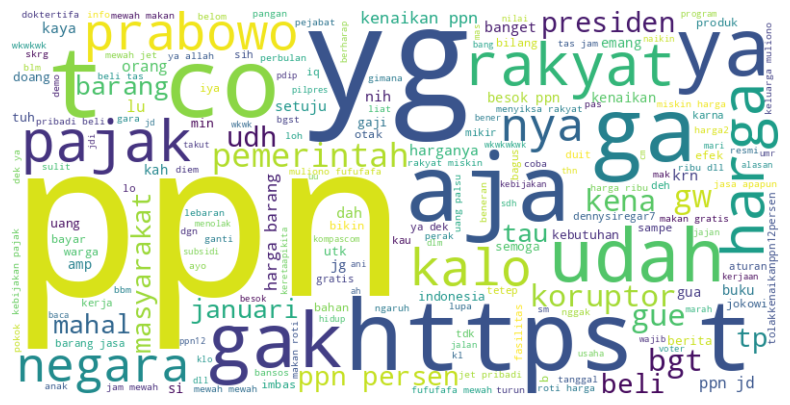

In [47]:
all_text = " ".join([" ".join(words) for words in df['remove_stop_words_nltk']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


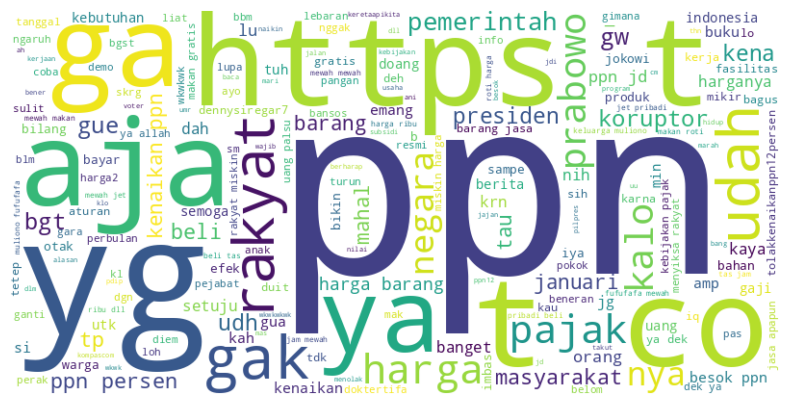

In [48]:
all_text = " ".join([" ".join(words) for words in df['remove_stop_words_spacy']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

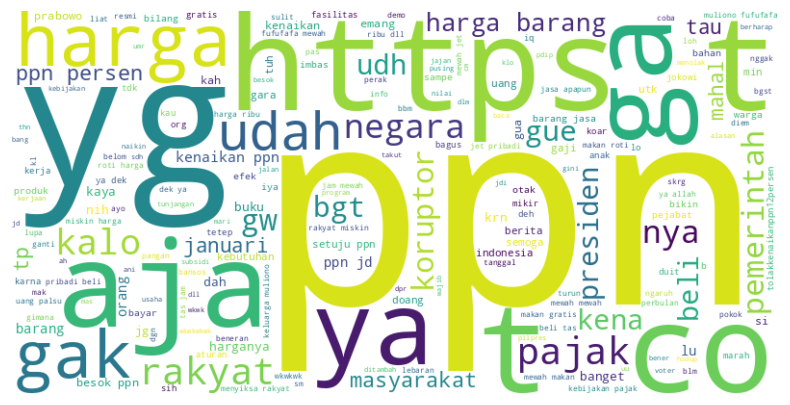

In [49]:
all_text = " ".join([" ".join(words) for words in df['remove_stop_words_tweet_tokenizer']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()